In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

2025-07-28 09:16:33.668851: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-28 09:16:33.700423: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-28 09:16:33.701102: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-28 09:16:34.257563: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#construct the argument parse and parse the argument
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=True,
help="path to the output loss/accuracy plot")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -o OUTPUT
ipykernel_launcher.py: error: the following arguments are required: -o/--output


SystemExit: 2

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
# grab the MNIST dataset

print ("[info] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

[info] accessing MNIST...


In [ ]:
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels

In [4]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [ ]:
# scale data to the range of [0,1]

In [5]:
trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32") / 255.0

In [6]:
print("trainY shape:", trainY.shape)

trainY shape: (60000,)


In [7]:
print("trainY sample:", trainY[:5])

trainY sample: [5 0 4 1 9]


In [8]:
print("trainY dtype:", trainY.dtype)
print("trainY sample:", trainY[:10])

trainY dtype: uint8
trainY sample: [5 0 4 1 9 2 1 3 1 4]


In [9]:

# converts the labels from integers to vectors

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [11]:
one_hot_map = {
    0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
}


In [12]:
print(one_hot_map[3]) 

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [17]:
# define the 784-256-128-10 architecture using Keras

model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [18]:
# train the model using SGD

print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 2s 2ms/step - loss: 2.2906 - accuracy: 0.1710 - val_loss: 2.2458 - val_accuracy: 0.3026
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 2.2125 - accuracy: 0.3799 - val_loss: 2.1712 - val_accuracy: 0.5566
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 2.1264 - accuracy: 0.5206 - val_loss: 2.0677 - val_accuracy: 0.6129
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 2.0032 - accuracy: 0.5936 - val_loss: 1.9176 - val_accuracy: 0.6321
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 1.8308 - accuracy: 0.6328 - val_loss: 1.7188 - val_accuracy: 0.6680
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 1.6203 - accuracy: 0.6696 - val_loss: 1.4981 - val_accuracy: 0.7098
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 1.4073 - accuracy: 0.7054 - val_loss: 1.

Epoch 58/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3155 - accuracy: 0.9098 - val_loss: 0.3052 - val_accuracy: 0.9118
Epoch 59/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3139 - accuracy: 0.9100 - val_loss: 0.3026 - val_accuracy: 0.9125
Epoch 60/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3123 - accuracy: 0.9105 - val_loss: 0.3014 - val_accuracy: 0.9123
Epoch 61/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.9112 - val_loss: 0.3001 - val_accuracy: 0.9130
Epoch 62/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3092 - accuracy: 0.9114 - val_loss: 0.2986 - val_accuracy: 0.9135
Epoch 63/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3077 - accuracy: 0.9114 - val_loss: 0.2973 - val_accuracy: 0.9133
Epoch 64/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3063 - accuracy: 0.9119 - val_loss: 0.2957 - val_accuracy:

In [19]:
# evaluate the network

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1),
target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 928us/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.90      0.89      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [20]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")

Page 27 of 32

plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output"])
$ python keras_mnist.py --output output/keras_mnist.png
[INFO] loading MNIST (full) dataset...
[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/100
1s - loss: 2.2997 - acc: 0.1088 - val_loss: 2.2918 - val_acc: 0.1145
Epoch 2/100
1s - loss: 0.2792 - acc: 0.9204 - val_loss: 0.2844 - val_acc: 0.9160
[INFO] evaluating network...
precision recall f1-score support
0.0 0.94 0.96 0.95 1726
1.0 0.95 0.97 0.96 2004
2.0 0.91 0.89 0.90 1747
3.0 0.91 0.88 0.89 1828
4.0 0.91 0.93 0.92 1686
avg / total 0.92 0.92 0.92 17500

SyntaxError: invalid decimal literal (155685039.py, line 21)

In [21]:
import os

In [22]:
# Set the style and initialize the figure
plt.style.use("ggplot")
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

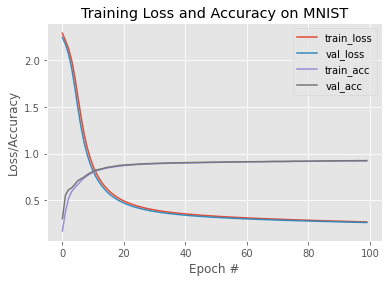

In [27]:
# Plot training and validation loss
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")

# Plot training and validation accuracy
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")

# Add title and axis labels
plt.title("Training Loss and Accuracy on MNIST")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [28]:
# Save the figure to file
output_path = "output/keras_mnist.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path)
print(f"[INFO] Plot saved to: {output_path}")

[INFO] Plot saved to: output/keras_mnist.png


<Figure size 432x288 with 0 Axes>

In [30]:
import random

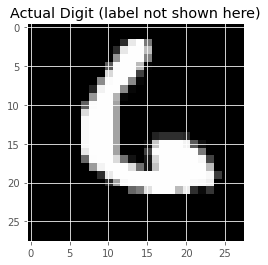

313/313 [==============================] - 0s 599us/step
The Predicted class is : 6


In [42]:
n = random.randint(0, testX.shape[0]-1)
plt.imshow(testX[n].reshape(28, 28), cmap='gray')
plt.title("Actual Digit (label not shown here)")
plt.show()
predicted_value = model.predict(testX)
print(f"The Predicted class is : {np.argmax(predicted_value[n])}")

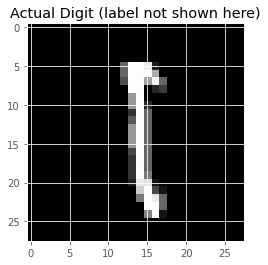

313/313 [==============================] - 0s 589us/step
The Predicted class is : 1


In [43]:
n = random.randint(0, testX.shape[0]-1)
plt.imshow(testX[n].reshape(28, 28), cmap='gray')
plt.title("Actual Digit (label not shown here)")
plt.show()
predicted_value = model.predict(testX)
print(f"The Predicted class is : {np.argmax(predicted_value[n])}")

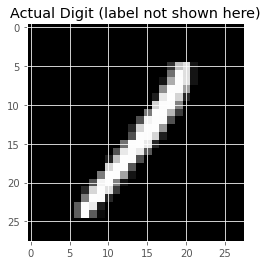

313/313 [==============================] - 0s 579us/step
The Predicted class is : 1


In [44]:
n = random.randint(0, testX.shape[0]-1)
plt.imshow(testX[n].reshape(28, 28), cmap='gray')
plt.title("Actual Digit (label not shown here)")
plt.show()
predicted_value = model.predict(testX)
print(f"The Predicted class is : {np.argmax(predicted_value[n])}")

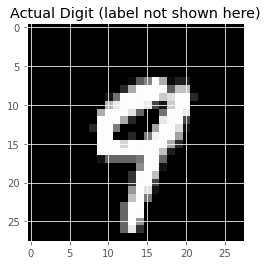

313/313 [==============================] - 0s 591us/step
The Predicted class is : 9


In [45]:
n = random.randint(0, testX.shape[0]-1)
plt.imshow(testX[n].reshape(28, 28), cmap='gray')
plt.title("Actual Digit (label not shown here)")
plt.show()
predicted_value = model.predict(testX)
print(f"The Predicted class is : {np.argmax(predicted_value[n])}")

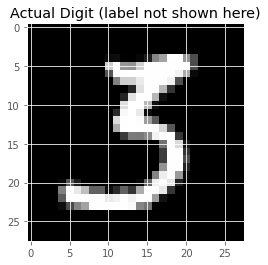

313/313 [==============================] - 0s 601us/step
The Predicted class is : 3


In [46]:
n = random.randint(0, testX.shape[0]-1)
plt.imshow(testX[n].reshape(28, 28), cmap='gray')
plt.title("Actual Digit (label not shown here)")
plt.show()
predicted_value = model.predict(testX)
print(f"The Predicted class is : {np.argmax(predicted_value[n])}")

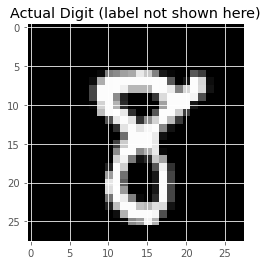

313/313 [==============================] - 0s 589us/step
The Predicted class is : 8


In [47]:
n = random.randint(0, testX.shape[0]-1)
plt.imshow(testX[n].reshape(28, 28), cmap='gray')
plt.title("Actual Digit (label not shown here)")
plt.show()
predicted_value = model.predict(testX)
print(f"The Predicted class is : {np.argmax(predicted_value[n])}")